# Decision Tree Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Prepare Dataset

In [2]:
datasetPath = "../Dataset/balanced-74Attributes-top17_ProtocolName.csv"

df = pd.read_csv(datasetPath)
#df = pd.read_csv(datasetPath, nrows=10000)
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,3232238138,55681,180881158,3128,6,19002242,3,17,6,30.0,...,7352281.0,0.000000,7352281.0,7352281.0,11649832.0,0.000000e+00,11649832.0,11649832.0,131,HTTP_PROXY
1,180881160,3128,3232246304,53107,6,119684671,1006,898,1398550,5388.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,131,HTTP_PROXY
2,3232243804,59584,180881158,3128,6,118953292,24,66,1325,5077.0,...,336393.6,238675.043634,655083.0,172.0,23388871.8,7.972935e+06,29761260.0,12118217.0,131,HTTP_PROXY
3,182845710,53446,180881157,3128,6,59992665,3,3,18,63.0,...,120.0,91.923882,185.0,55.0,29995813.0,2.121108e+07,44994310.0,14997316.0,131,HTTP_PROXY
4,3232254003,21192,180881159,3128,6,1413924,22,0,4622,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,131,HTTP_PROXY


In [3]:
# Encode label for ProtocolName column

encoder = LabelEncoder().fit(df['ProtocolName'])
df['ProtocolName'] = encoder.fit_transform(df['ProtocolName'])

In [4]:
X = df.drop('ProtocolName',axis=1)
Y = df['ProtocolName']

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)


## Train Model

In [5]:
%load_ext memory_profiler

In [6]:
dt = DecisionTreeClassifier()

In [7]:
%%time
%memit dt.fit(x_train , y_train)

peak memory: 698.02 MiB, increment: 55.85 MiB
CPU times: user 4.32 s, sys: 26 ms, total: 4.34 s
Wall time: 4.45 s


In [8]:
dt.tree_.node_count, dt.tree_.max_depth

(33, 10)

In [9]:
%%time
%memit score = dt.score(x_test, y_test)

peak memory: 672.60 MiB, increment: 22.27 MiB
CPU times: user 70.9 ms, sys: 39.8 ms, total: 111 ms
Wall time: 227 ms


In [10]:
score

1.0

In [11]:
%%time
%memit y_pred = dt.predict(x_test)

peak memory: 672.61 MiB, increment: 0.00 MiB
CPU times: user 88.6 ms, sys: 35.8 ms, total: 124 ms
Wall time: 242 ms


## Make sure the models is overfitting

#### cross validate observation

In [12]:
from sklearn.model_selection import cross_validate

cross_validate(dt, x_train, y_train, return_train_score=True)

{'fit_time': array([3.3687129 , 3.25531173, 3.27418947, 3.58660746, 3.55798197]),
 'score_time': array([0.00985885, 0.00956011, 0.01360941, 0.01050973, 0.0105474 ]),
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

#### retrain with different max_dept and compare the train and test scores 

>1, train: 0.118, test: 0.116
>2, train: 0.178, test: 0.174
>3, train: 0.296, test: 0.291
>4, train: 0.413, test: 0.409
>5, train: 0.531, test: 0.526
>6, train: 0.590, test: 0.584
>7, train: 0.707, test: 0.702
>8, train: 0.825, test: 0.820
>9, train: 0.942, test: 0.940
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000


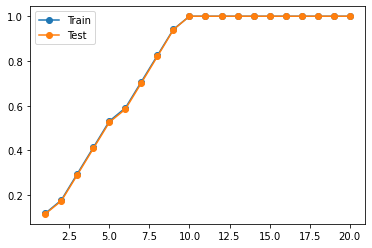

In [13]:
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(x_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## Results

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4325
           1       1.00      1.00      1.00      4344
           2       1.00      1.00      1.00      4401
           3       1.00      1.00      1.00      4318
           4       1.00      1.00      1.00      4432
           5       1.00      1.00      1.00      4344
           6       1.00      1.00      1.00      4268
           7       1.00      1.00      1.00      4421
           8       1.00      1.00      1.00      4305
           9       1.00      1.00      1.00      4325
          10       1.00      1.00      1.00      4375
          11       1.00      1.00      1.00      4351
          12       1.00      1.00      1.00      4291
          13       1.00      1.00      1.00      4388
          14       1.00      1.00      1.00      4359
          15       1.00      1.00      1.00      4304
          16       1.00      1.00      1.00      4287

    accuracy              

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(accuracy, precision, recall, f1)

1.0 1.0 1.0 1.0


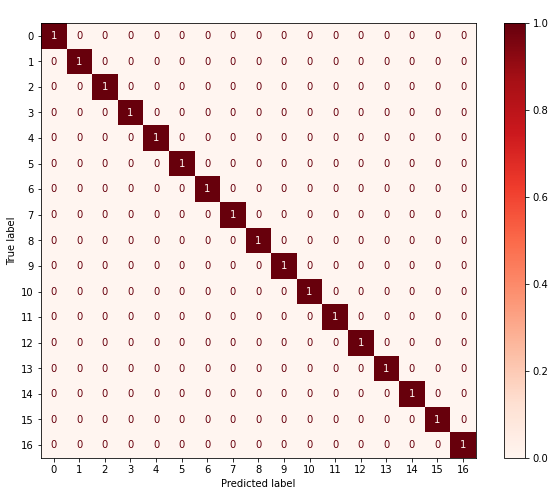

In [17]:
matrix = plot_confusion_matrix(dt, x_test, y_test, normalize='true', cmap=plt.cm.Reds)
matrix.ax_.set_title("Confusion Matrix", color="white")
plt.gcf().set_size_inches(10, 8)
plt.show()

<AxesSubplot:>

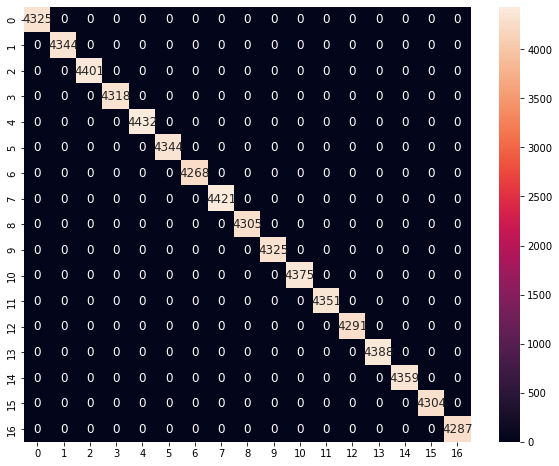

In [18]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(cm, annot=True, ax=ax, fmt='d', annot_kws={"size": 12})